Github Link : https://github.com/Foxtrot123-png/Machine-Learning-Project

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay


In [2]:
cancer = load_breast_cancer()

In [3]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

df['target'] = cancer.target

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [8]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [9]:
df['target'].unique()

array([0, 1])

In [10]:

m = []
c=[]
for i in df.index:
    if df['target'][i] == 0:
        m.append('o')
        c.append('g')
    else : 
        m.append('x')
        c.append('r')
    

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


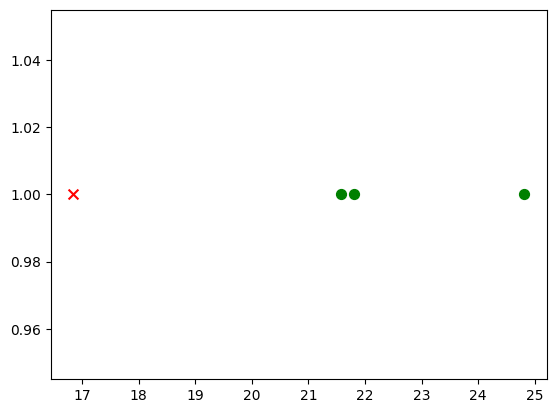

In [12]:

for i in range(40,48,2):
    plt.scatter(df['mean texture'][i],1, color=c[i], marker=m[i], s = 50)


plt.show()



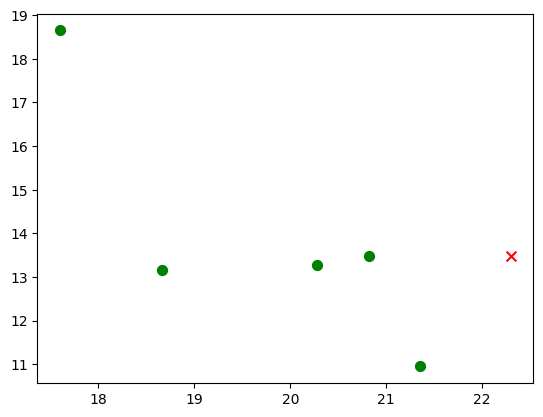

In [13]:
for i in range(39,50,2):
    plt.scatter(df['mean texture'][i],df['mean radius'][i], color=c[i], marker=m[i], s = 50)


plt.show()

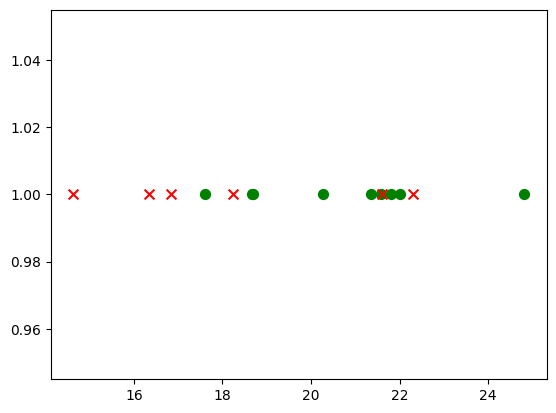

In [14]:
for i in range(40,55):
    plt.scatter(df['mean texture'][i],1, color=c[i], marker=m[i], s = 50)


plt.show()

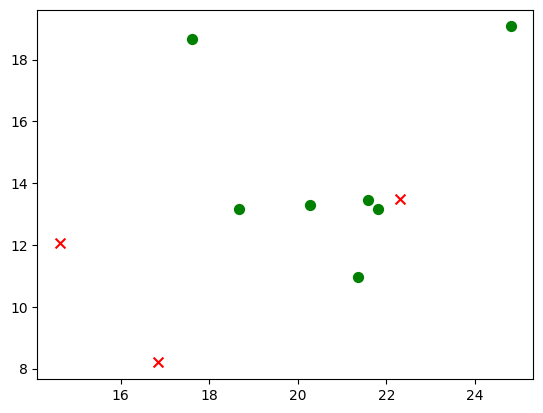

In [15]:
for i in range(40,50):
    plt.scatter(df['mean texture'][i],df['mean radius'][i], color=c[i], marker=m[i], s = 50)


plt.show()

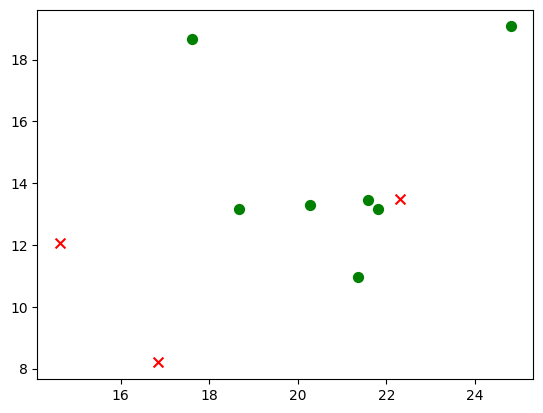

In [16]:
for i in range(40,50):
    plt.scatter(df['mean texture'][i],df['mean radius'][i], color=c[i], marker=m[i], s = 50)


plt.show()

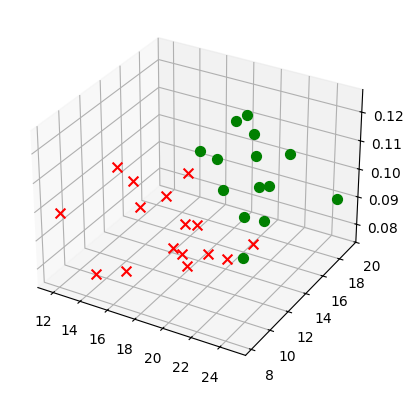

In [17]:
#Uncomment this when you need to visualize this 
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
        
for i in range(40,70):
    ax.scatter(df['mean texture'][i],df['mean radius'][i],df['mean smoothness'][i], color=c[i], marker=m[i], s = 50)


plt.show()


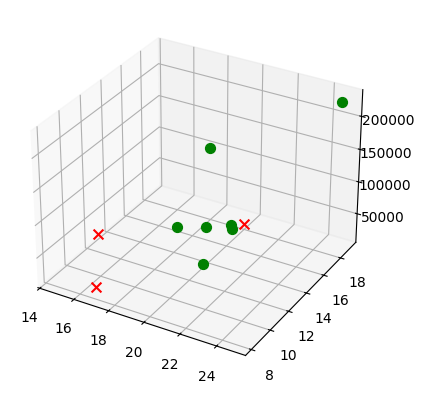

In [18]:
#%matplotlib qt
#Uncomment this when you need to visualize this 


from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
        
for i in range(40,50):
    ax.scatter(df['mean texture'][i],df['mean radius'][i],np.power(df['mean texture'][i],2)+np.power(df['mean radius'][i],2)+np.power(df['mean radius'][i],2)*np.power(df['mean texture'][i],2), color=c[i], marker=m[i], s = 50)


plt.show()


In [19]:



def plot_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True,X=None,y=None,colors=None,gamma= 1.5,c=0.1,m=None
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=gamma,C=c)
    clf_ = clf.fit(X,y)

    fig, ax = plt.subplots()
    x_min, x_max, y_min, y_max = 13, 25,5, 20
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    DecisionBoundaryDisplay.from_estimator(
        estimator = clf_,
        X=X,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
        ax=ax
    )
    DecisionBoundaryDisplay.from_estimator(
        estimator = clf_,
        X=X,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        ax=ax
    )
    ax.scatter(
        clf_.support_vectors_[:, 0],
        clf_.support_vectors_[:, 1],
        s=150,
        facecolors="none",
        edgecolors="k"
    )

    # Plot samples by color and add legend
    for i in range(len(X)):
        ax.scatter(X.iloc[i, 0], X.iloc[i, 1],c=colors[i],marker=m[i], s=30, edgecolors="k")
    c_ = {
        "r":"Malignant",
        "g":"Benign"
    }
    for i in set(colors):
        ax.scatter([], [], color=i, label=f"{c_[i]}")
    ax.legend(loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

In [20]:
Dataframe = df[['mean texture','mean radius']]
Dataframe.dtypes

mean texture    float64
mean radius     float64
dtype: object

C:\Users\ritik\AppData\Local\Temp\ipykernel_7076\2217429237.py:41: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X.iloc[i, 0], X.iloc[i, 1],c=colors[i],marker=m[i], s=30, edgecolors="k")


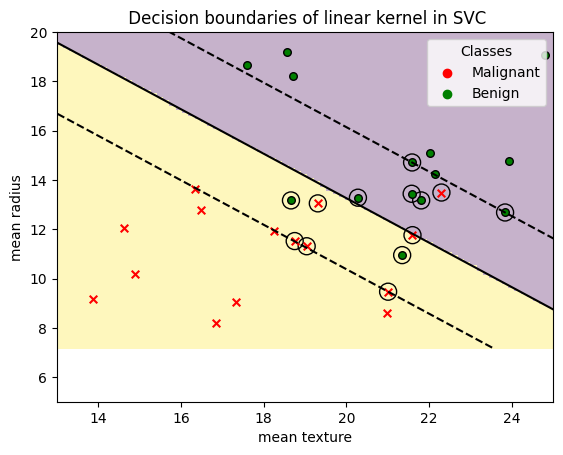

In [21]:
plot_data_with_decision_boundary(kernel='linear',X=Dataframe[40:70],y=df['target'][40:70],colors=c[40:70],m=m[40:70])

C:\Users\ritik\AppData\Local\Temp\ipykernel_7076\2217429237.py:41: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X.iloc[i, 0], X.iloc[i, 1],c=colors[i],marker=m[i], s=30, edgecolors="k")


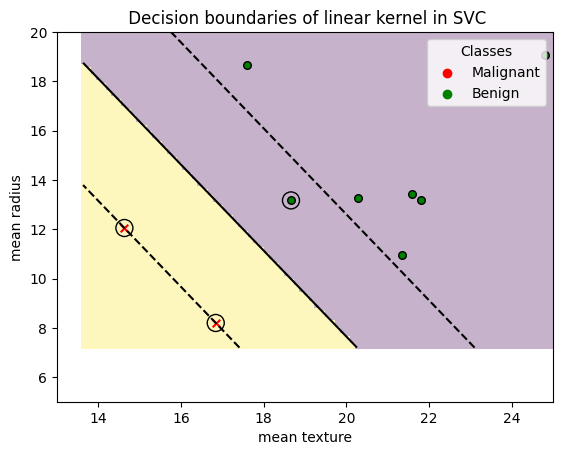

In [22]:
plot_data_with_decision_boundary(kernel='linear',X=Dataframe[40:49],y=df['target'][40:49],colors=c[40:49],m=m[40:49])

C:\Users\ritik\AppData\Local\Temp\ipykernel_7076\2217429237.py:41: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X.iloc[i, 0], X.iloc[i, 1],c=colors[i],marker=m[i], s=30, edgecolors="k")


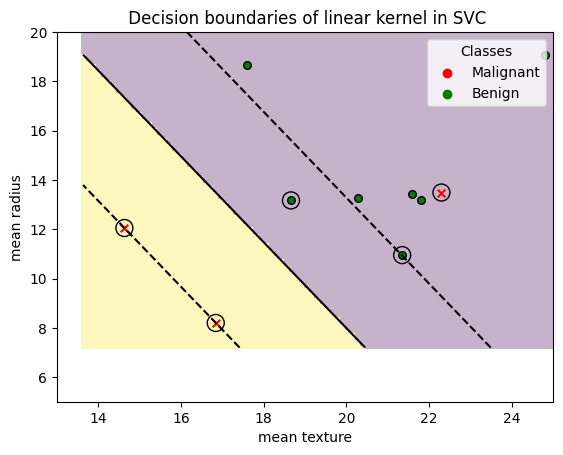

In [23]:
plot_data_with_decision_boundary(kernel='linear',X=Dataframe[40:50],y=df['target'][40:50],colors=c[40:50],m=m[40:50],gamma=0,c=100)

C:\Users\ritik\AppData\Local\Temp\ipykernel_7076\2217429237.py:41: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X.iloc[i, 0], X.iloc[i, 1],c=colors[i],marker=m[i], s=30, edgecolors="k")


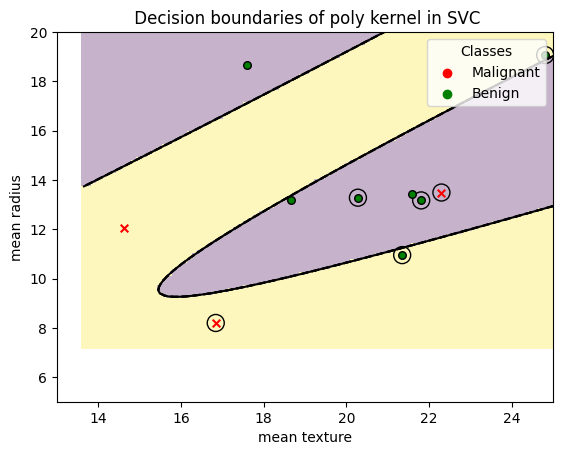

In [24]:
plot_data_with_decision_boundary(kernel='poly',X=Dataframe[40:50],y=df['target'][40:50],colors=c[40:50],c=100,gamma=10,m=m[40:50])

C:\Users\ritik\AppData\Local\Temp\ipykernel_7076\2217429237.py:41: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X.iloc[i, 0], X.iloc[i, 1],c=colors[i],marker=m[i], s=30, edgecolors="k")


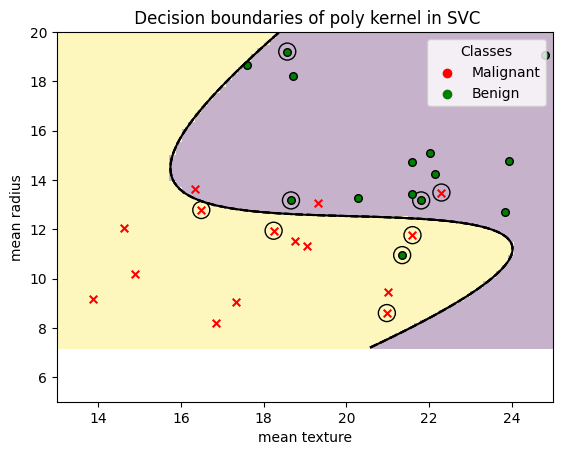

In [25]:
plot_data_with_decision_boundary(kernel='poly',X=Dataframe[40:70],y=df['target'][40:70],colors=c[40:70],c=100,gamma=10,m=m[40:70])

In [26]:
len(df)

569

In [27]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [28]:
for i in df.columns:
    y = df[i].unique()
    print(f"{i}:{len(y)}")

mean radius:456
mean texture:479
mean perimeter:522
mean area:539
mean smoothness:474
mean compactness:537
mean concavity:537
mean concave points:542
mean symmetry:432
mean fractal dimension:499
radius error:540
texture error:519
perimeter error:533
area error:528
smoothness error:547
compactness error:541
concavity error:533
concave points error:507
symmetry error:498
fractal dimension error:545
worst radius:457
worst texture:511
worst perimeter:514
worst area:544
worst smoothness:411
worst compactness:529
worst concavity:539
worst concave points:492
worst symmetry:500
worst fractal dimension:535
target:2


(array([ 17.,  96., 154., 145.,  89.,  40.,  21.,   4.,   2.,   1.]),
 array([ 9.71 , 12.667, 15.624, 18.581, 21.538, 24.495, 27.452, 30.409,
        33.366, 36.323, 39.28 ]),
 <BarContainer object of 10 artists>)

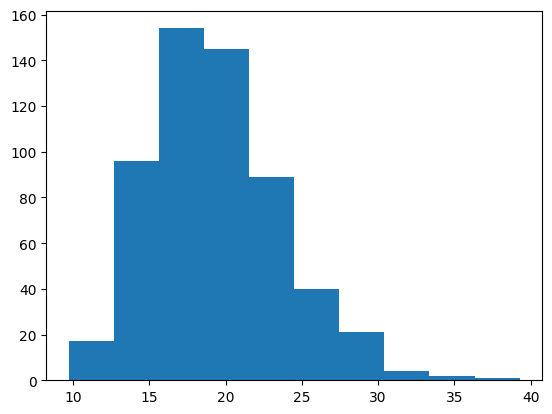

In [29]:
plt.hist(df['mean texture'])
#This shoes most of the number of passengers have tickets that cost from 0 to 150 pounds.

In [30]:
X= df.drop(columns=['target'])
y=df['target']

In [31]:
#Imported The SVM Library and Train Test Split
from sklearn import svm
from sklearn.model_selection import train_test_split

In [32]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
X_=X.iloc[:,:2]

In [34]:
X_.isna().sum()

mean radius     0
mean texture    0
dtype: int64

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_,y,test_size=.20,random_state=200)

In [36]:
X_train.isna().sum()

mean radius     0
mean texture    0
dtype: int64

In [37]:
X_train.describe()

,mean radius,mean texture
count,455.000000,455.000000
mean,14.180035,19.245187
std,3.586747,4.252258
min,6.981000,10.380000
25%,11.710000,16.000000
50%,13.430000,18.890000
75%,16.025000,21.815000
max,28.110000,33.560000


In [38]:
y_train.head()

483    1
286    1
348    1
301    1
105    0
Name: target, dtype: int32

In [39]:
y_train.shape

(455,)

In [40]:
c = []
for i in df.index:
    if df['target'][i] == 0:
        c.append('r')
    else : 
        c.append('g')

c[:5]

['r', 'r', 'r', 'r', 'r']

In [41]:
def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True,X=None,y=None,colors=None,gamma= 1.5,c=1
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=gamma,C=c)
    clf_ = clf.fit(X,y)

    fig, ax = plt.subplots(figsize=(8, 6))
    x_min, x_max, y_min, y_max = 5, 28, 5, 34
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    DecisionBoundaryDisplay.from_estimator(
        estimator = clf_,
        X=X,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
        ax=ax
    )
    DecisionBoundaryDisplay.from_estimator(
        estimator = clf_,
        X=X,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        ax=ax
    )
    ax.scatter(
        clf_.support_vectors_[:, 0],
        clf_.support_vectors_[:, 1],
        s=150,
        facecolors="none",
        edgecolors="k"
    )

    # Plot samples by color and add legend
    
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1],c=colors, s=30, edgecolors="k")
    c_ = {
        "r":"Malignant",
        "g":"Benign"
    }
    for i in set(colors):
        ax.scatter([], [], color=i, label=f"{c_[i]}")
    ax.legend(loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

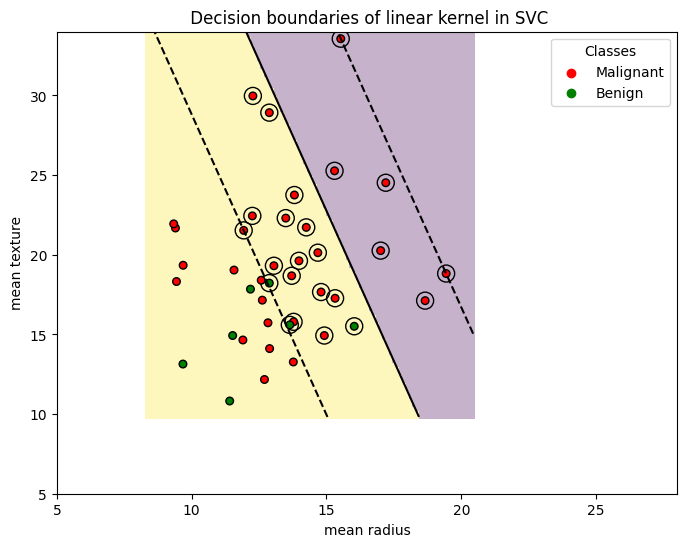

In [ ]:
plot_training_data_with_decision_boundary(kernel='linear',X=X_train[10:50],y=y_train[10:50],colors=c[10:50],c=0.01)

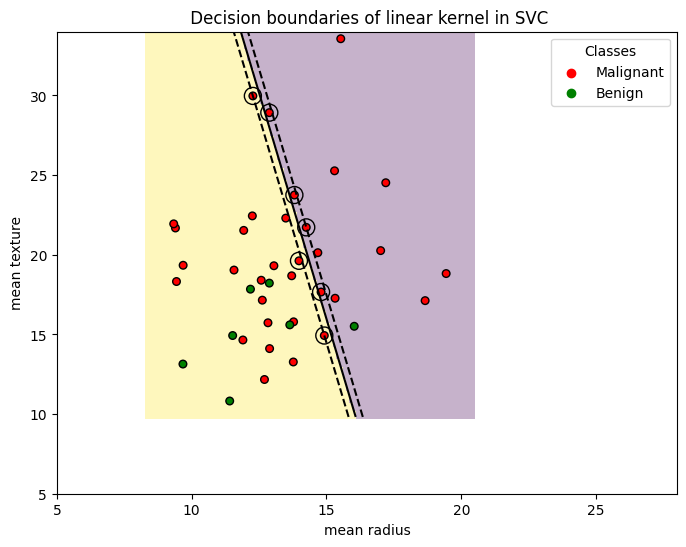

In [ ]:
plot_training_data_with_decision_boundary(kernel='linear',X=X_train[10:50],y=y_train[10:50],colors=c[10:50],c=100)

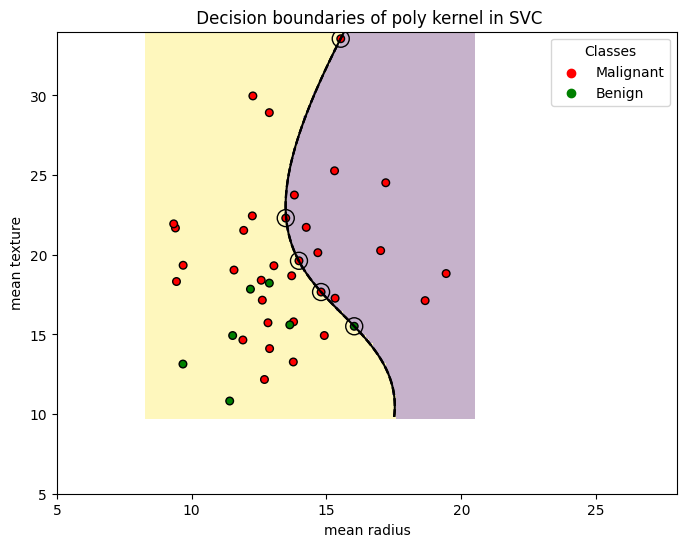

In [ ]:
plot_training_data_with_decision_boundary(kernel='poly',X=X_train[10:50],y=y_train[10:50],colors=c[10:50])

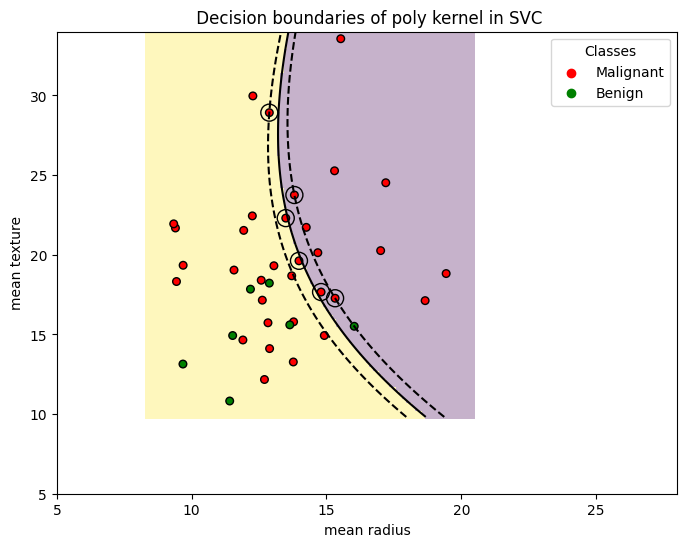

In [ ]:
plot_training_data_with_decision_boundary(kernel='poly',X=X_train[10:50],y=y_train[10:50],colors=c[10:50],c=0.000001)

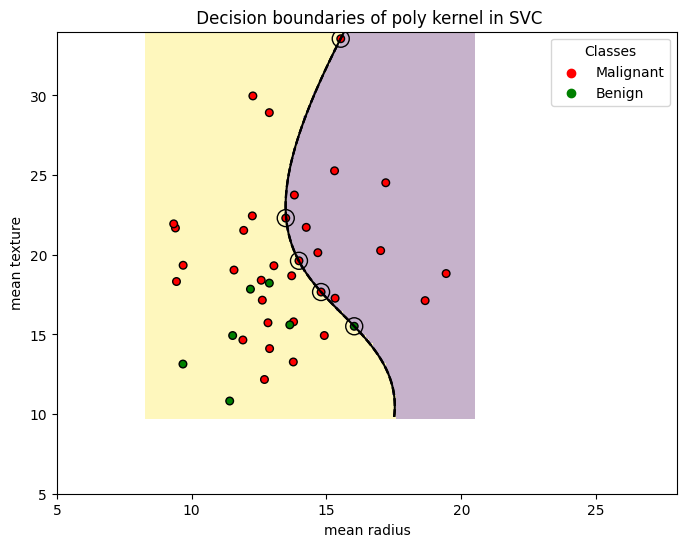

In [ ]:
plot_training_data_with_decision_boundary(kernel='poly',X=X_train[10:50],y=y_train[10:50],colors=c[10:50],c=100)

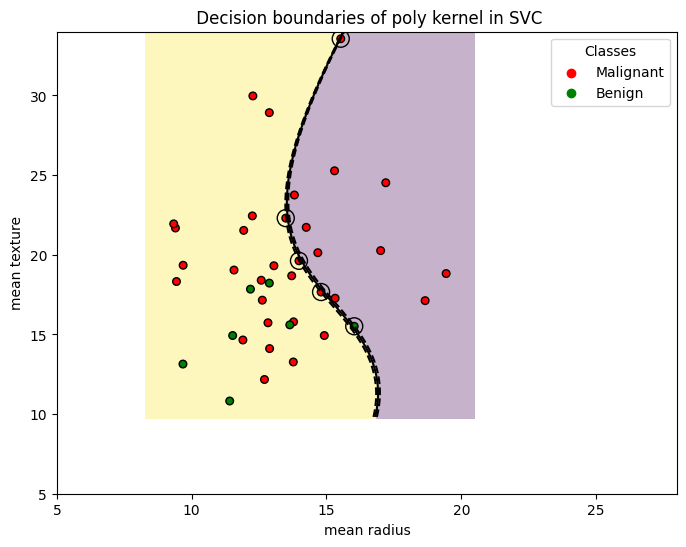

In [ ]:
plot_training_data_with_decision_boundary(kernel='poly',X=X_train[10:50],y=y_train[10:50],colors=c[10:50],c=0.01)

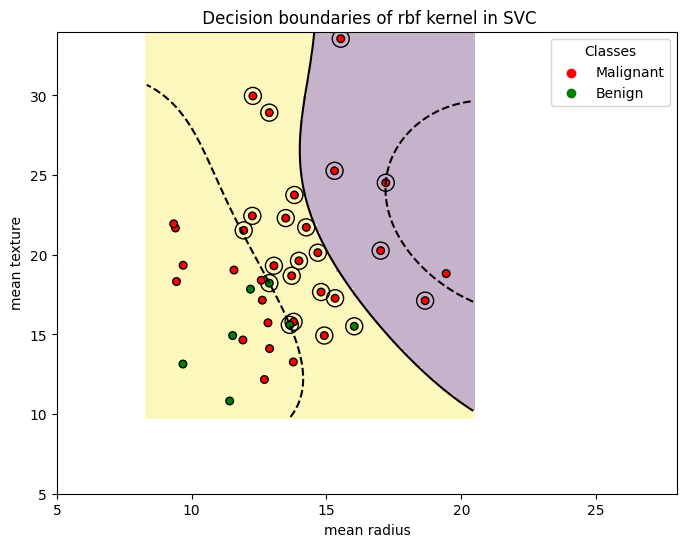

In [48]:
plot_training_data_with_decision_boundary(kernel='rbf',X=X_train[10:50],y=y_train[10:50],colors=c[10:50],gamma=0.01)

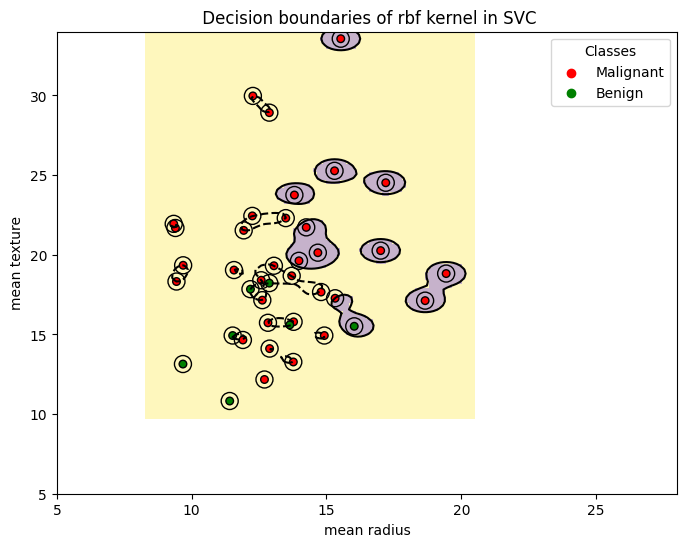

In [49]:
plot_training_data_with_decision_boundary(kernel='rbf',X=X_train[10:50],y=y_train[10:50],colors=c[10:50])

In [ ]:
from sklearn.model_selection import GridSearchCV
svm = svm.SVC()
p = {
    'C': [0.1, 1, 10], 
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear','poly']
}
grid_search = GridSearchCV(svm, p, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_


In [ ]:
print(best_params)

Refrences:
https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
https://scikit-learn.org/stable/modules/svm.html
https://www.geeksforgeeks.org/support-vector-machine-algorithm/
https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/

In [ ]:
#